In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_dir = "Horse_Human/train"
test_dir = "Horse_Human/test"

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [6]:
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 256 images belonging to 2 classes.


In [7]:
print(f"Training Images: {train_gen.samples}")
print(f"Testing Images: {test_gen.samples}")

Training Images: 1027
Testing Images: 256


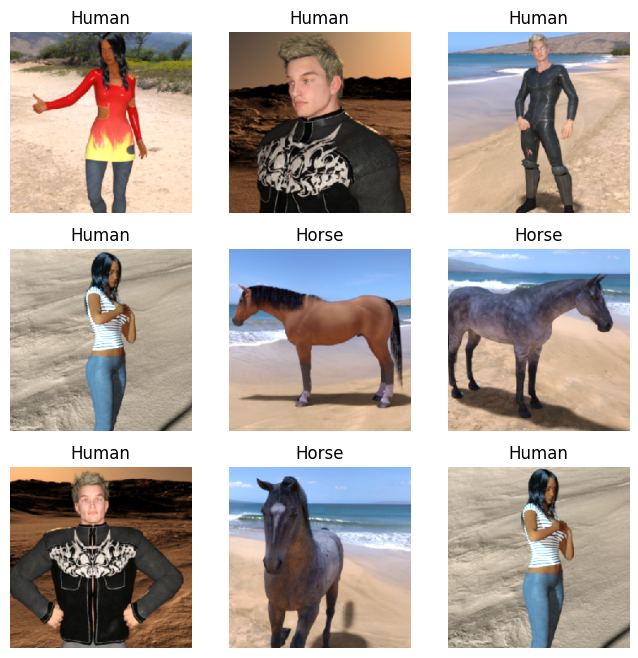

In [8]:
images, labels = next(train_gen)
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title("Horse" if labels[i]==0 else "Human")
    plt.axis('off')
plt.show()

In [9]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

In [10]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_gen, validation_data=test_gen, epochs=8)

Epoch 1/8
33/33 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.5803 - loss: 0.6793 - val_accuracy: 0.7227 - val_loss: 0.5654
Epoch 2/8
33/33 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.7118 - loss: 0.5903 - val_accuracy: 0.6406 - val_loss: 0.6538
Epoch 3/8
33/33 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.7157 - loss: 0.5605 - val_accuracy: 0.6250 - val_loss: 0.7769
Epoch 4/8
33/33 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.7585 - loss: 0.5080 - val_accuracy: 0.7188 - val_loss: 0.6780
Epoch 5/8
33/33 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.7702 - loss: 0.4789 - val_accuracy: 0.6953 - val_loss: 0.7304
Epoch 6/8
33/33 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.8121 - loss: 0.4429 - val_accuracy: 0.6641 - val_loss: 0.9472
Epoch 7/8
33/33 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.8072 - loss: 0.4224 - val_accuracy: 0.6875 - val_loss: 0.9314
Epoch 8/8
33/33 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.7897 - loss: 0.4291 - val_accuracy: 0.6680 - val_loss: 1.0541


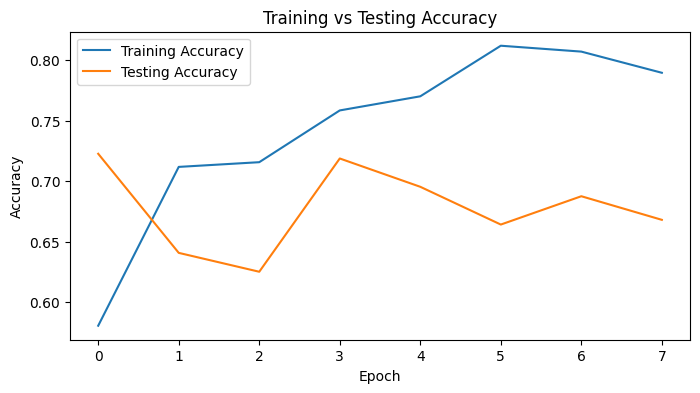

In [13]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()